In [1]:
# Enable autocompletion
%config IPCompleter.greedy=True

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
pd.set_option('display.max_columns',None)

import random
# Setting seeds to reduce randomness and make re-producibility
random.seed(0) 

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

In [4]:
data.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Exploratory Data Analysis

## In this section we would find out below
1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: SalePrice

## 1. Missing values

In [6]:
# find missing values columns and their percentage
def missing_values(data):
    data = data.copy()
    missing_cols = [var for var in data.columns if data[var].isnull().sum()>2]
    
    # some reason map is not working need a fix
    #missing_percentage = map(lambda data , col : (np.round(data[col].isnull().mean()*100)),data,missing_cols))
    
    #finding missing value percentage
    #missing_percentage = [np.round(data[var].isnull().mean()*100) for var in  missing_cols]
    return  missing_cols

In [7]:
missing_values = missing_values(data)
for var in missing_values:
    print(var, '  column has missing value as  ', np.round(data[var].isnull().mean()*100,2))

LotFrontage   column has missing value as   17.74
Alley   column has missing value as   93.77
MasVnrType   column has missing value as   0.55
MasVnrArea   column has missing value as   0.55
BsmtQual   column has missing value as   2.53
BsmtCond   column has missing value as   2.53
BsmtExposure   column has missing value as   2.6
BsmtFinType1   column has missing value as   2.53
BsmtFinType2   column has missing value as   2.6
FireplaceQu   column has missing value as   47.26
GarageType   column has missing value as   5.55
GarageYrBlt   column has missing value as   5.55
GarageFinish   column has missing value as   5.55
GarageQual   column has missing value as   5.55
GarageCond   column has missing value as   5.55
PoolQC   column has missing value as   99.52
Fence   column has missing value as   80.75
MiscFeature   column has missing value as   96.3


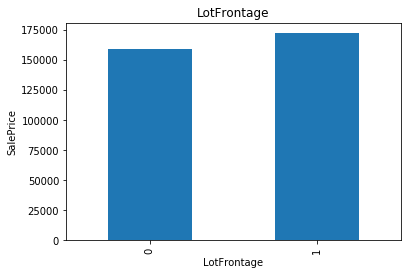

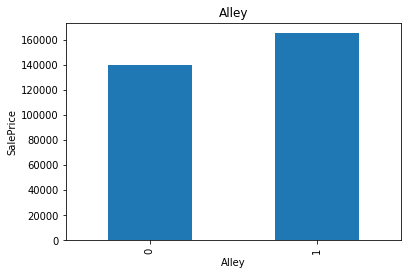

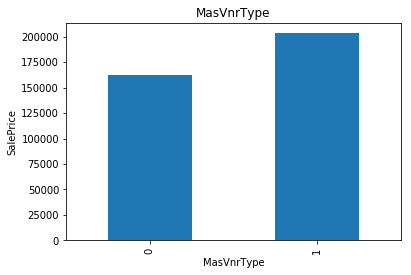

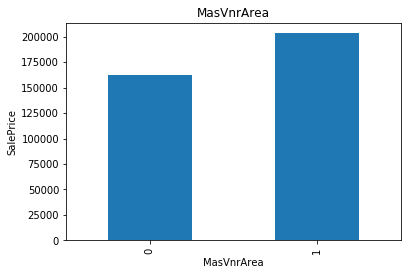

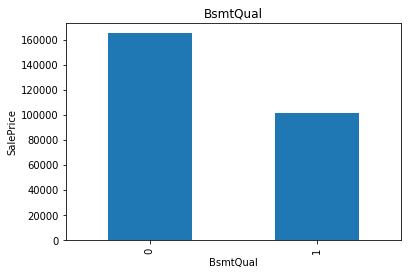

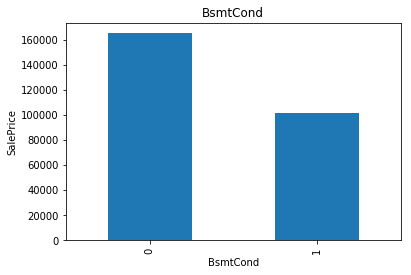

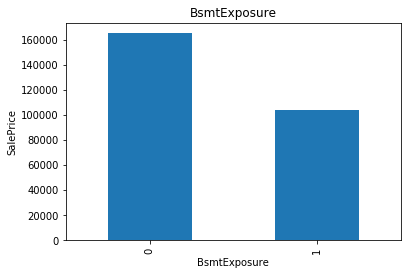

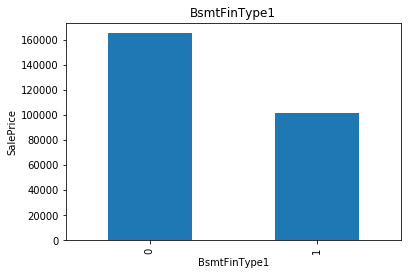

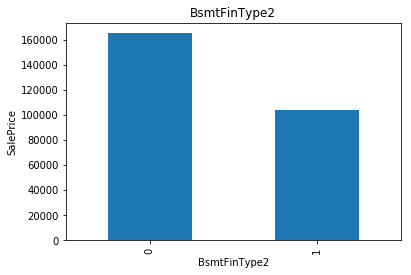

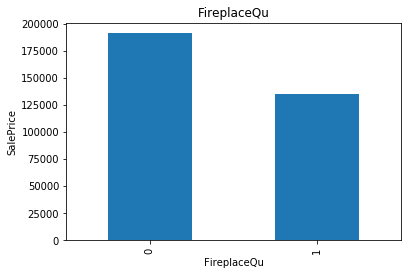

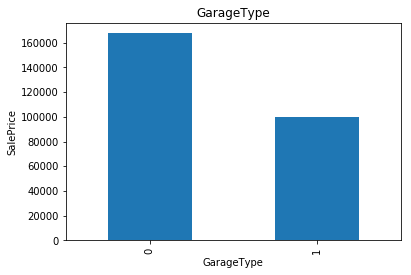

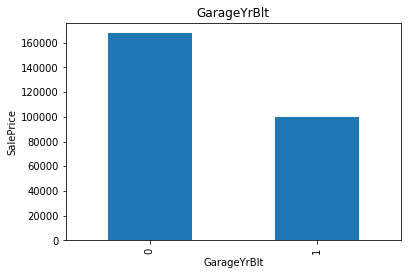

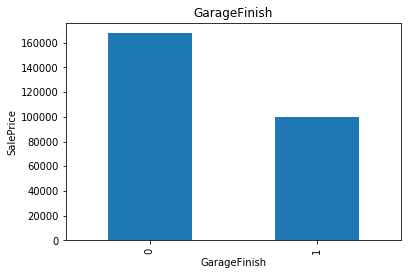

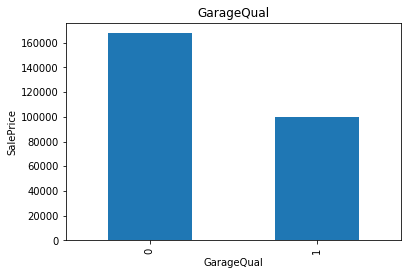

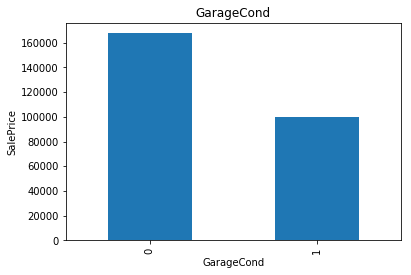

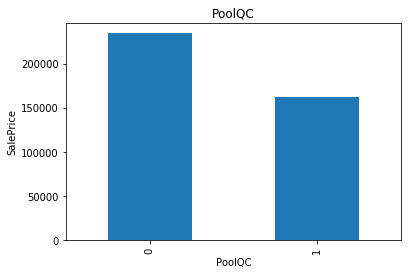

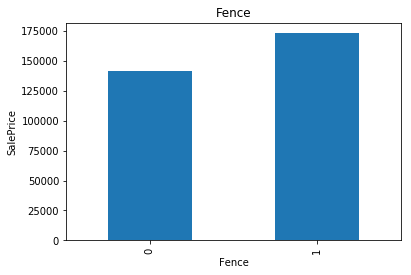

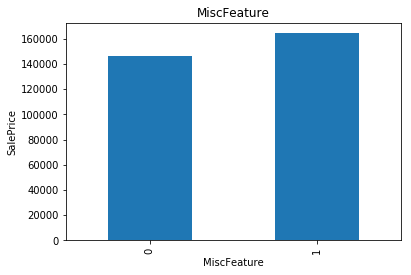

In [8]:
# Visualise the importance of missing values on SellPrice
def analyse_na_value(data, var):
    data = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[var]  = np.where(data[var].isnull(),1,0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(var)['SalePrice'].median().plot.bar()
    plt.title(var)
    plt.ylabel('SalePrice')
    plt.show()


for var in missing_values:
    analyse_na_value(data,var)

Here we can clearly see the missing values and non-missing values have comparable sale price. So can't ignore these values.

### 2. Numerical variables

In [9]:
# list of numerical variables
num_vars = [var for var in data.columns if data[var].dtypes != 'O']

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


Let us analyse the temporal variable

In [10]:
# Columns that contains year information in numerical columns
year_var = [var for var in num_vars if  'Year'  in var or 'Yr' in var or 'yr' in var]

# Let us get the all the distinct year values
for var in year_var:
    print(var ,data[var].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Let us understand the relation between SellPrice and YrSold

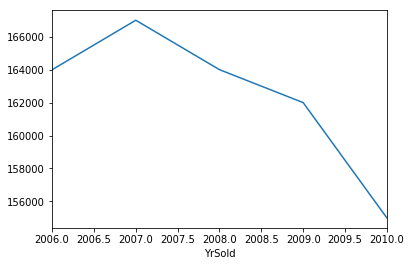

In [11]:
# Visualising the relation between SellPrice and Build year
data.groupby('YrSold')['SalePrice'].median().plot()
plt.show()

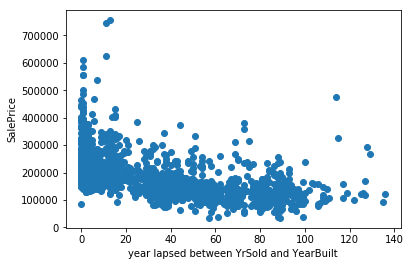

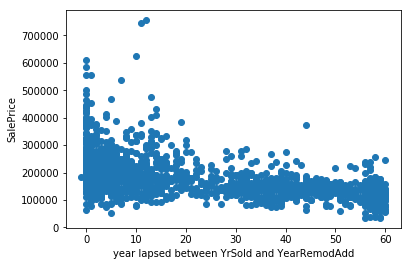

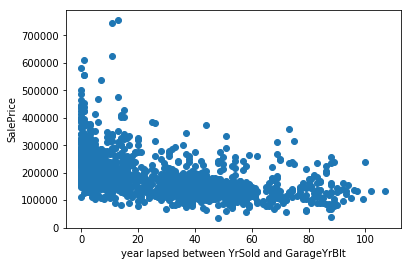

In [12]:
# Let us visualise how SalePrice changes with  respect to the YrSold column
def visualise_year(data, year_var):
    data = data.copy()
    for col in year_var:
        if col != 'YrSold':
            plt.scatter(data['YrSold']-data[col],data[ 'SalePrice'] )
            plt.ylabel('SalePrice')
            plt.xlabel('year lapsed between YrSold and '+col)
            plt.show()

visualise_year(data, year_var)

From all the visualis we can confirm that SalePrice decreases as the YrSold increases from feature year.

Let us see the discrete valued columns now

In [13]:
# calculate discrete valued columns
discrete_var = [var for var in num_vars if data[var].unique().size<20 and var not in year_var]

# Discrete value column and its colunt
for var in discrete_var:
    print(var, ' column has count ', data[var].unique().size)

MSSubClass  column has count  15
OverallQual  column has count  10
OverallCond  column has count  9
BsmtFullBath  column has count  4
BsmtHalfBath  column has count  3
FullBath  column has count  4
HalfBath  column has count  3
BedroomAbvGr  column has count  8
KitchenAbvGr  column has count  4
TotRmsAbvGrd  column has count  12
Fireplaces  column has count  4
GarageCars  column has count  5
PoolArea  column has count  8
MoSold  column has count  12


In [14]:
print('Number of discrete variables: ', len(discrete_var))
#Visualise the discrete values data
data[discrete_var].head()

Number of discrete variables:  14


,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


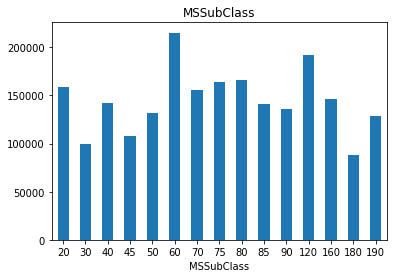

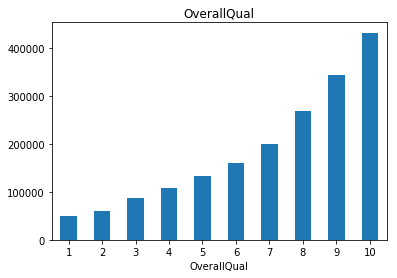

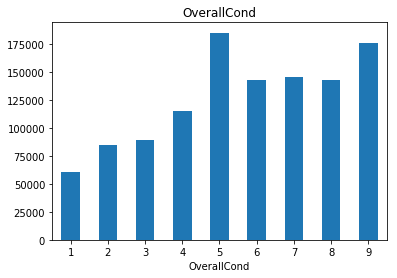

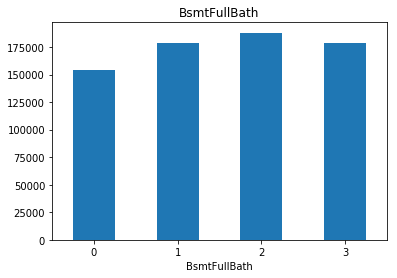

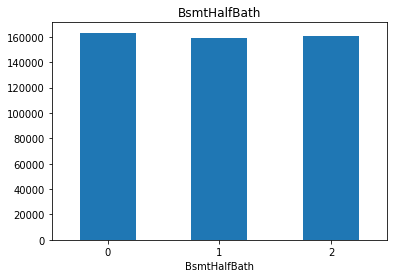

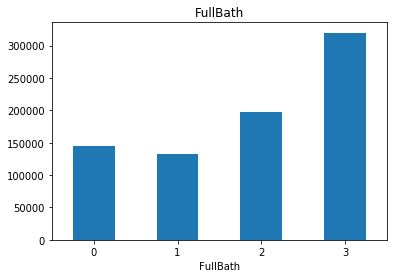

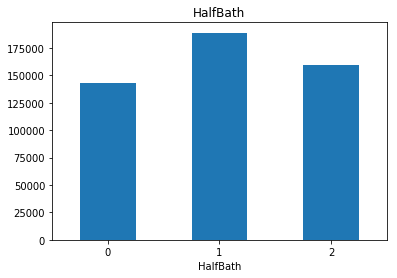

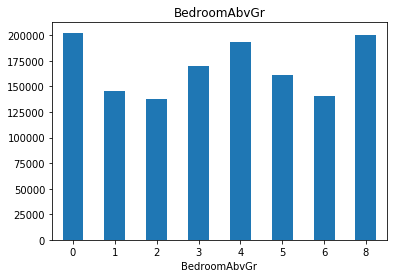

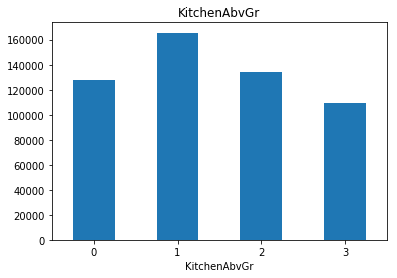

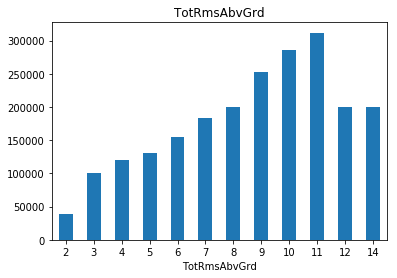

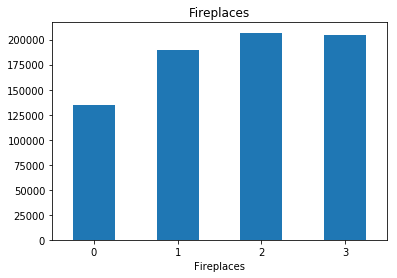

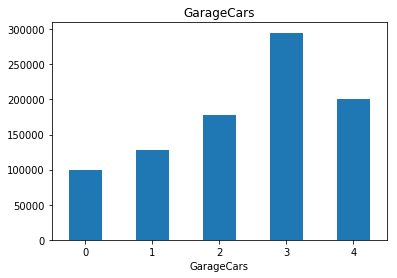

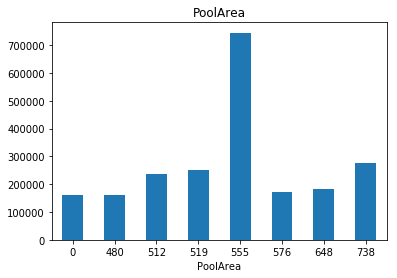

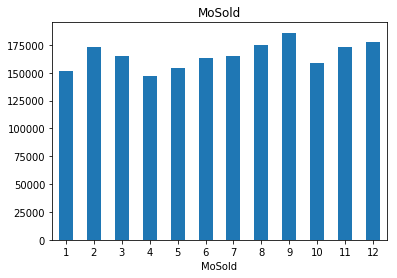

In [15]:
# Visualise the discrete variable
def analyse_discrete(data,var):
    # Take a copy of the data
    data = data.copy()
    
    #Visualise the discrete column and selling price
    data.groupby(var)['SalePrice'].median().plot(kind ='bar',rot=0)
    plt.title(var)
    #plt.ylabel('SalePrice')
    plt.show()
    
    
for var in discrete_var:
    analyse_discrete(data,var)


#### Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous all those that are not temporal or discrete variables in our dataset.

In [16]:
# Calculate continuos variables
continuos_values = [var for var in num_vars if var not in year_var+discrete_var+['Id']]
print('Continuos values count is ', len(continuos_values))

Continuos values count is  19


In [17]:
# Visualise the continuous variables
data[continuos_values].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


In [18]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(data, var):
    data = data.copy()
    data[var].hist(bins=20)
    plt.title(var)
    plt.show()

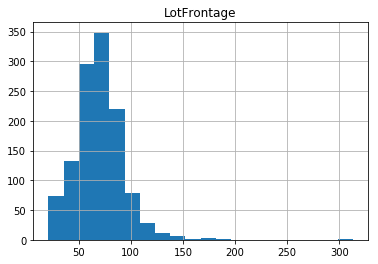

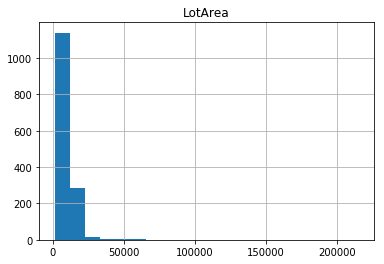

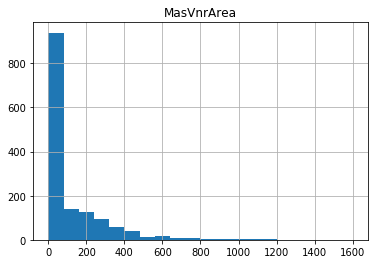

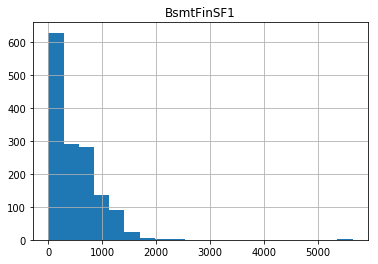

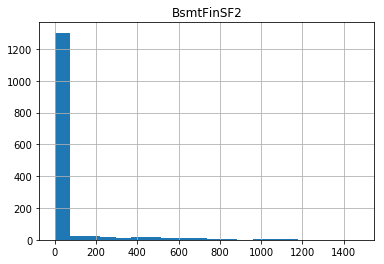

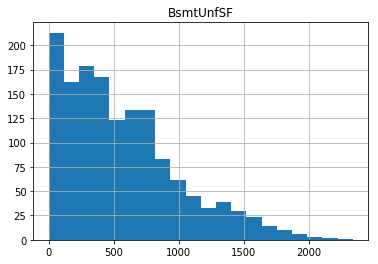

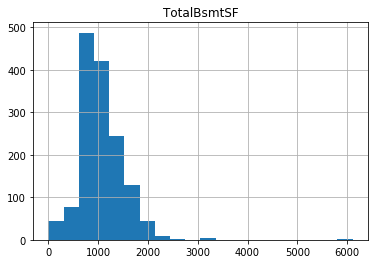

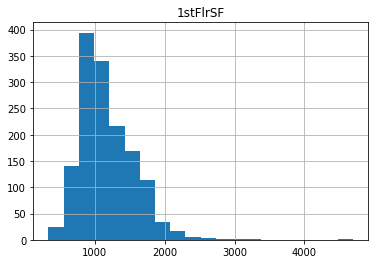

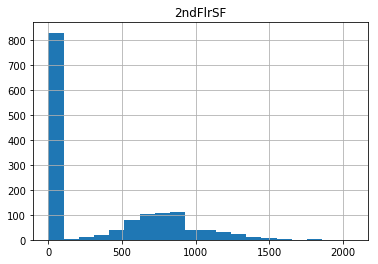

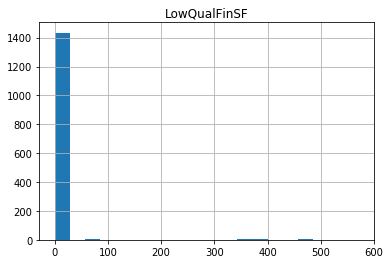

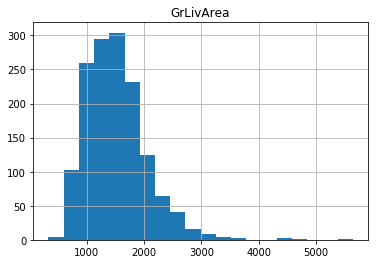

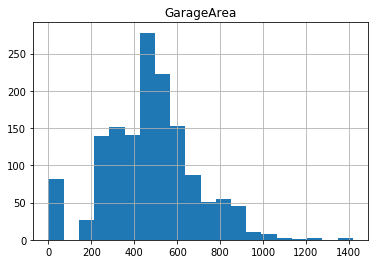

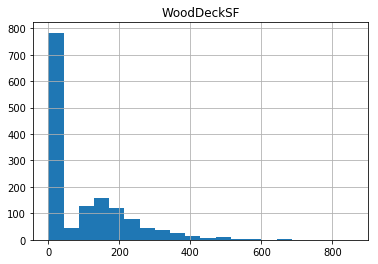

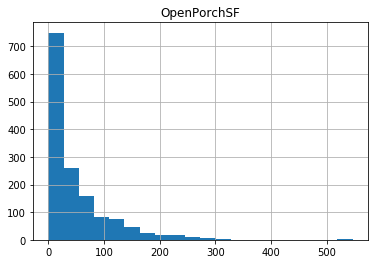

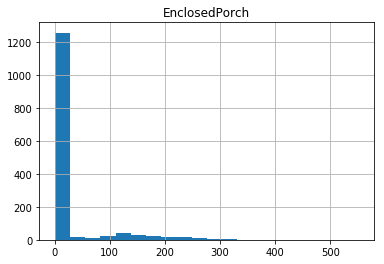

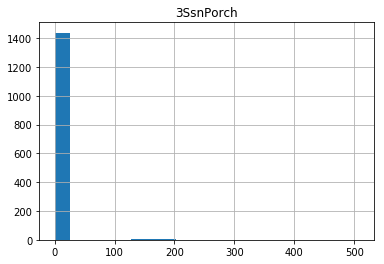

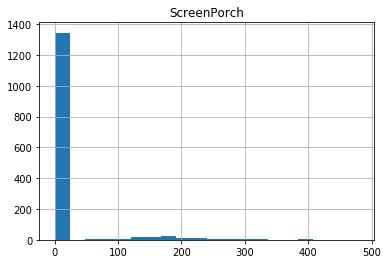

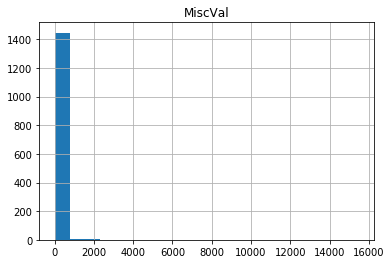

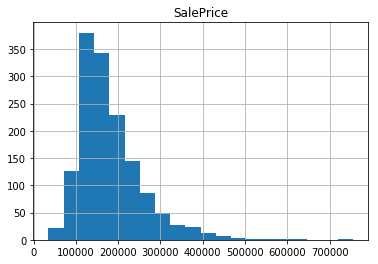

In [19]:
for var in continuos_values:
    analyse_continous(data,var)

We see that all of the above variables, are not normally distributed, including the target variable 'SalePrice'. For linear models to perform best, we need to account for non-Gaussian distributions. We will transform our variables in the next lecture / video, during our feature engineering section.

Let's also evaluate here if a log transformation renders the variables more Gaussian looking:

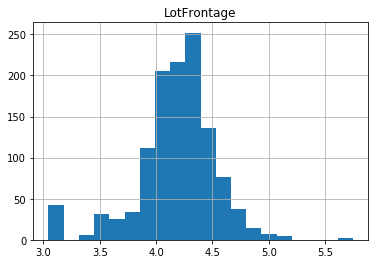

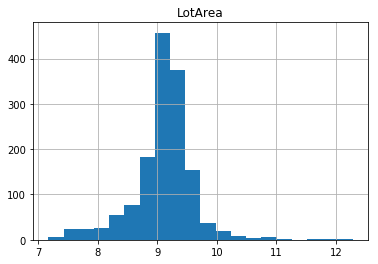

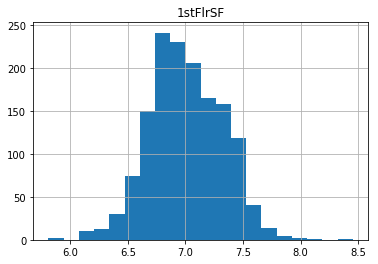

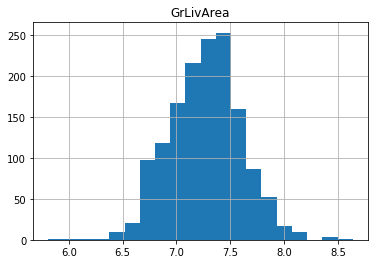

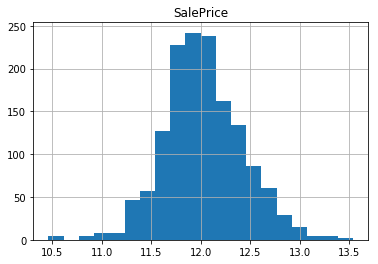

In [20]:
def analyse_transformed_continous(data, var):
    data = data.copy()
    if(0 in data[var].unique()):
        pass
    else:
        data[var] = np.log(data[var])
        data[var].hist(bins=20)
        plt.title(var)
        plt.show()
        
for var in continuos_values:
    analyse_transformed_continous(data,var)

We get a better spread of values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

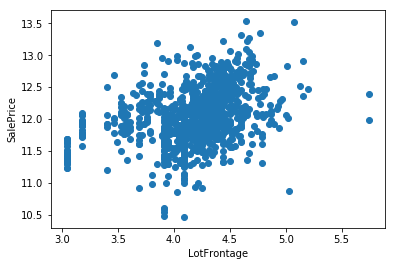

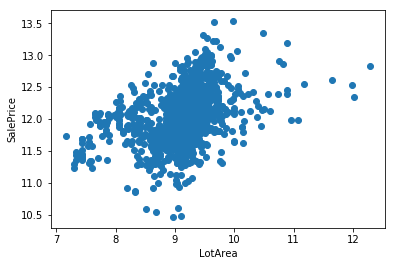

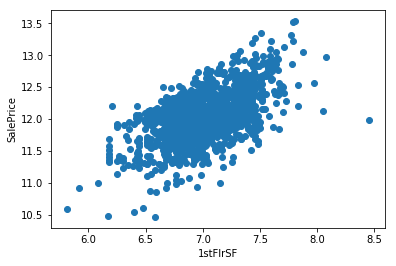

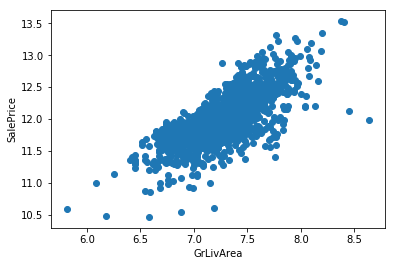

In [21]:
# Let us understand the relationship between the SellPrice and transformed
# contineous varible
def transform_analyse_continous(data, var):
    data = data.copy()
    
    # log does not take negative values, so let's be careful and skip those variables
    if(0 in data[var].unique()):
        pass
    else:
        data[var] = np.log(data[var])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(x = data[var], y = data['SalePrice'] )
        plt.ylabel('SalePrice')
        plt.xlabel(var)
        plt.show()

for var in continuos_values:
    if(var != 'SalePrice'):
        transform_analyse_continous(data,var)

#### Outliers

Let us see the outliers in the continous varible

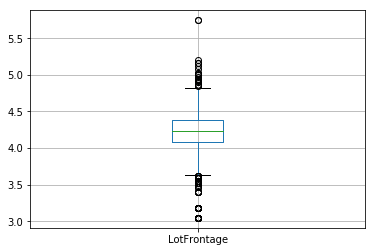

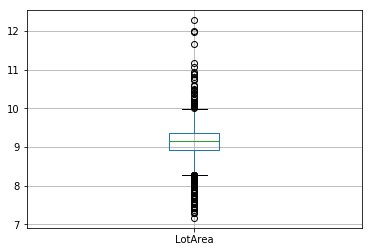

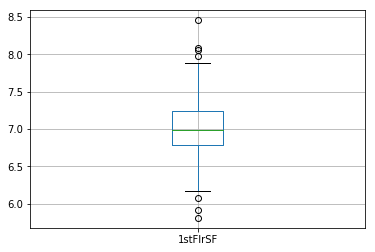

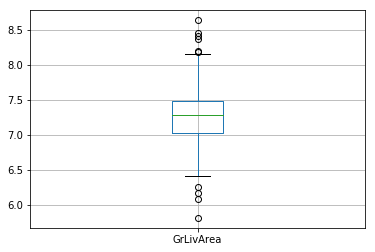

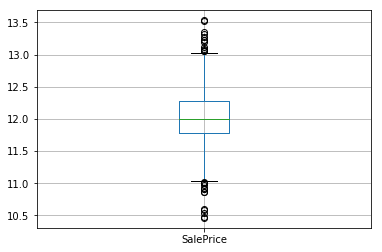

In [22]:
# let's make boxplots to visualise outliers in the continuous variables
def analyse_outlier(data, var):
    # Take a copy of the data source
    data = data.copy()
    
    # log for negetive value and 0 not exist, so let's be careful and skip those values
    if(0 in data[var].unique()):
        pass
    else:
        data[var] = np.log(data[var])
        data.boxplot(column= var)
        plt.show()

for var in continuos_values:
    analyse_outlier(data,var);

The majority of the continuous variables seem to contain outliers. Outliers tend to affect the performance of linear model. So it is worth spending some time understanding if removing outliers will add performance value to our final machine learning model.


### Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [24]:
# Lets see the category varible present in the dataset

category_variables = [var for var in data.columns if data[var].dtypes == 'object']

print('Number of categorical variables: ', len(category_variables))

Number of categorical variables:  43


In [25]:
# Lets us visualise the category variables

data[category_variables].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


#### Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

In [26]:
for var in category_variables:
    print(var,' has ' ,data[var].unique().size,' categories' )

MSZoning  has  5  categories
Street  has  2  categories
Alley  has  3  categories
LotShape  has  4  categories
LandContour  has  4  categories
Utilities  has  2  categories
LotConfig  has  5  categories
LandSlope  has  3  categories
Neighborhood  has  25  categories
Condition1  has  9  categories
Condition2  has  8  categories
BldgType  has  5  categories
HouseStyle  has  8  categories
RoofStyle  has  6  categories
RoofMatl  has  8  categories
Exterior1st  has  15  categories
Exterior2nd  has  16  categories
MasVnrType  has  5  categories
ExterQual  has  4  categories
ExterCond  has  5  categories
Foundation  has  6  categories
BsmtQual  has  5  categories
BsmtCond  has  5  categories
BsmtExposure  has  5  categories
BsmtFinType1  has  7  categories
BsmtFinType2  has  7  categories
Heating  has  6  categories
HeatingQC  has  5  categories
CentralAir  has  2  categories
Electrical  has  6  categories
KitchenQual  has  4  categories
Functional  has  7  categories
FireplaceQu  has  6  cat

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering.

In [27]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()
    tmp = df.groupby(var)['SalePrice'].count() / len(df)
    return tmp[tmp<rare_perc]

for var in category_variables:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. We need to engineer these variables.
Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house price:

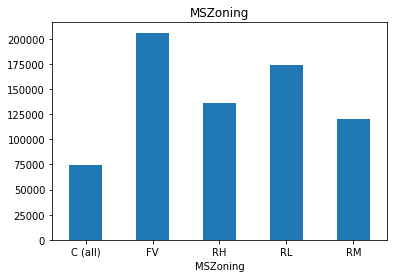

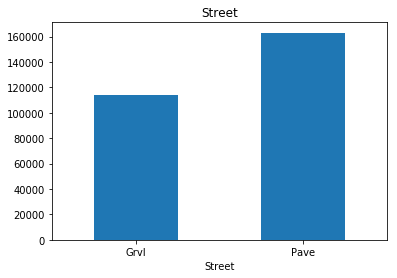

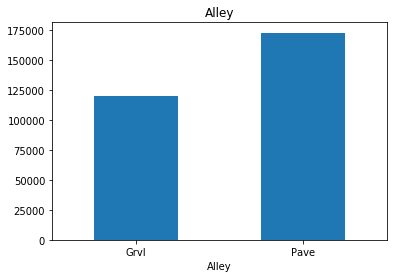

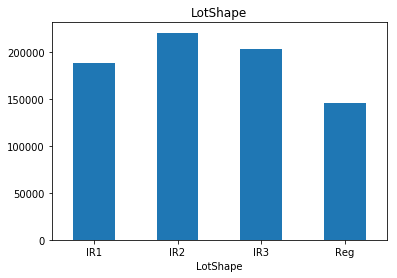

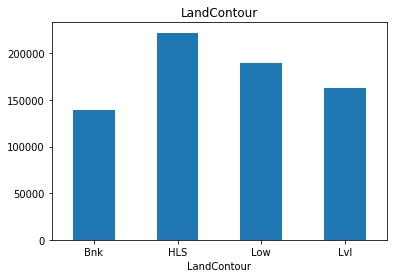

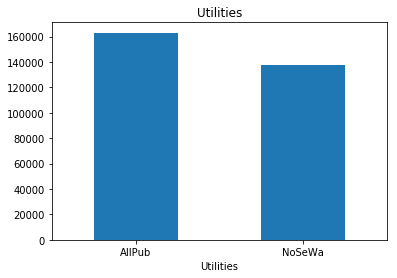

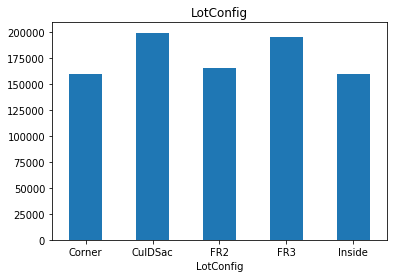

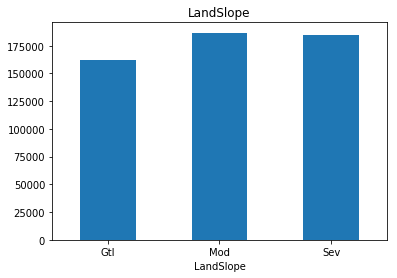

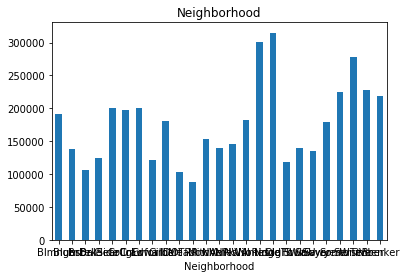

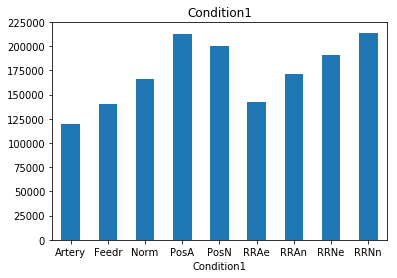

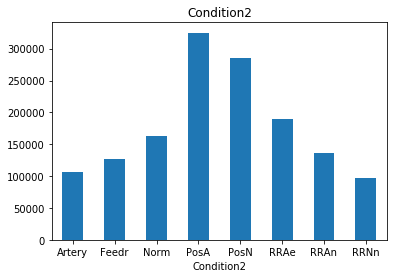

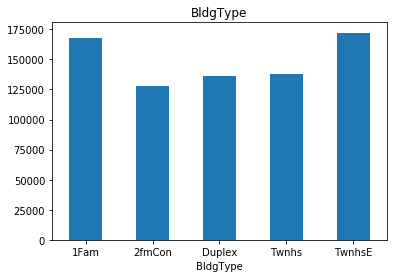

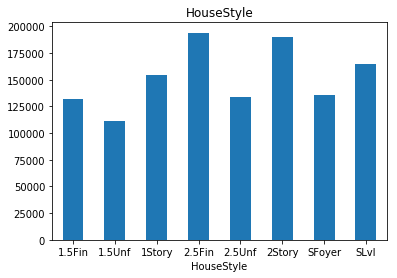

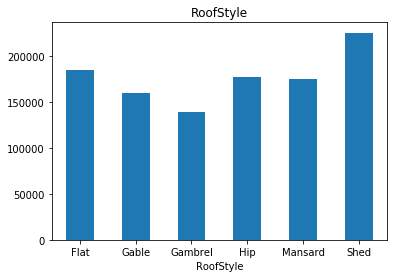

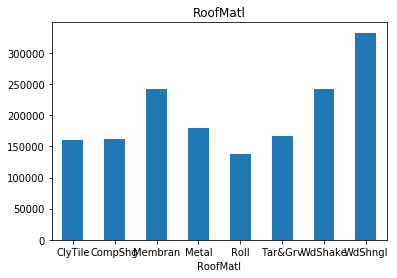

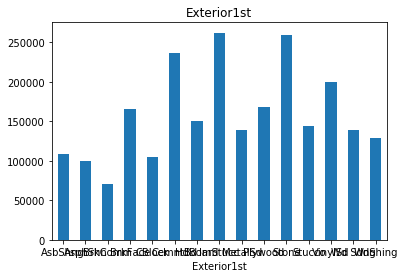

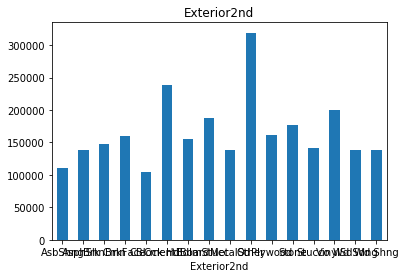

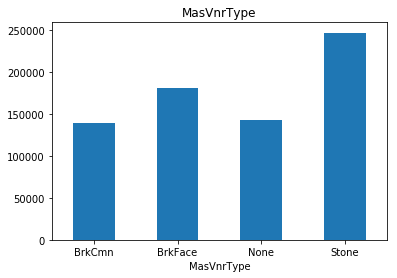

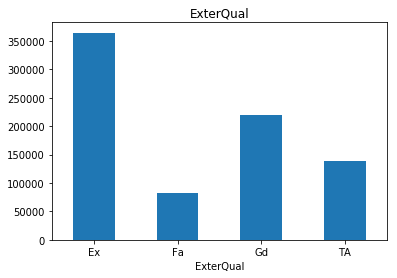

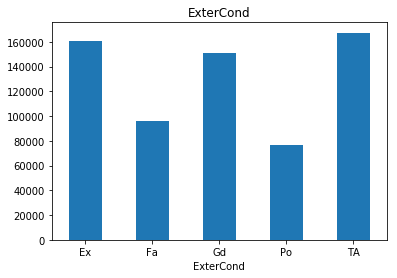

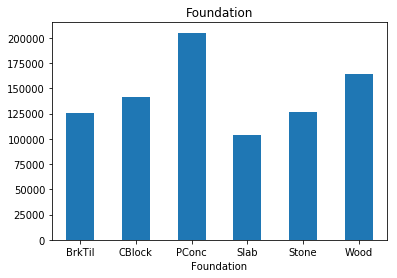

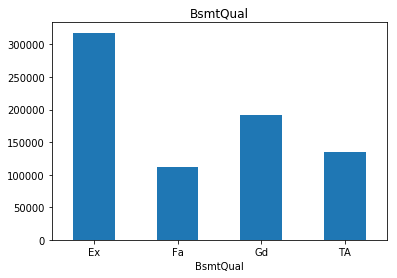

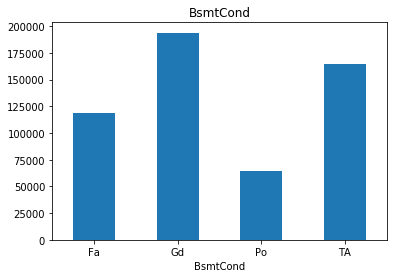

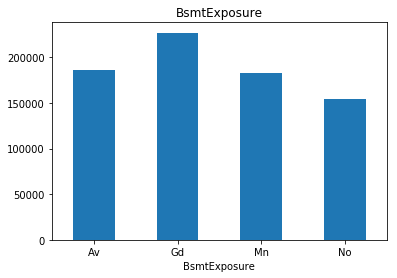

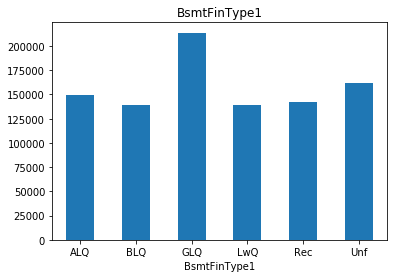

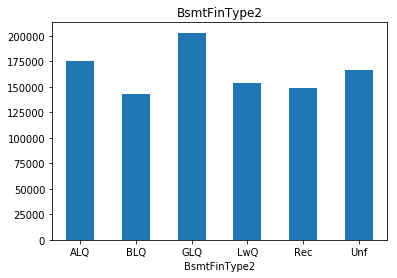

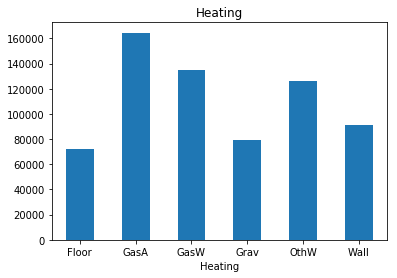

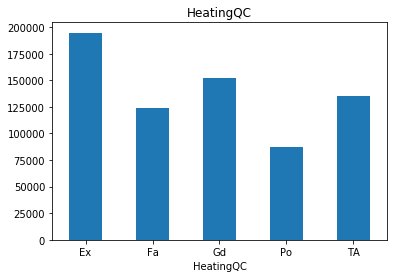

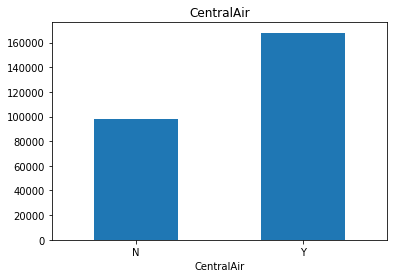

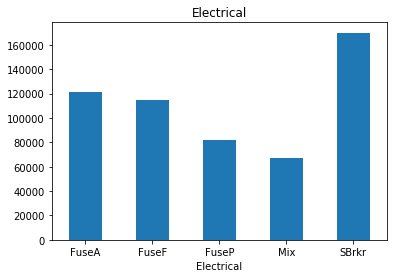

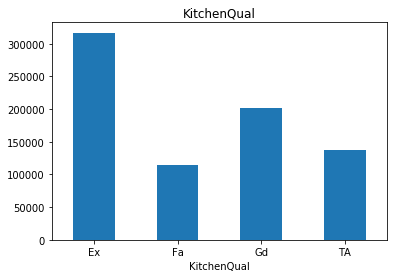

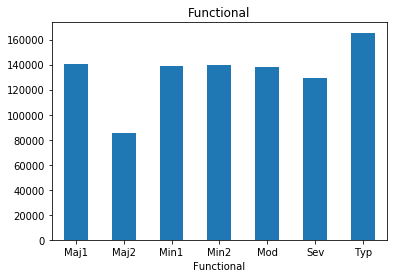

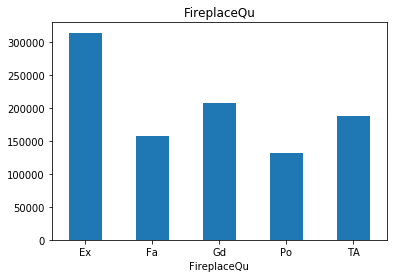

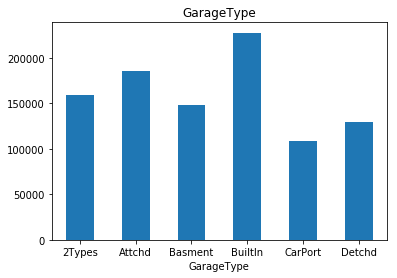

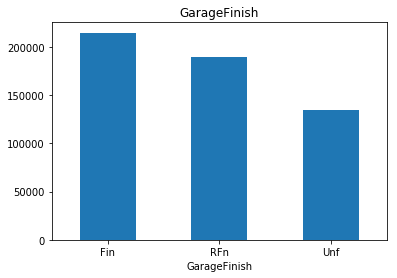

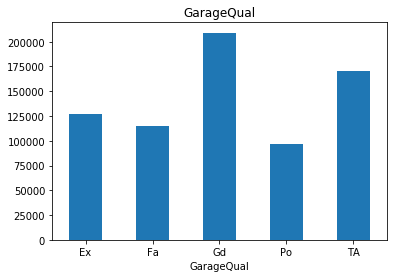

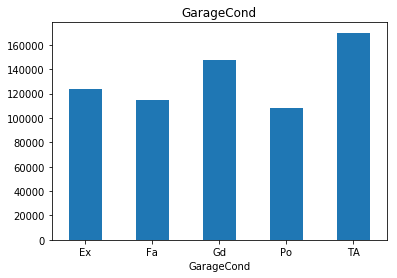

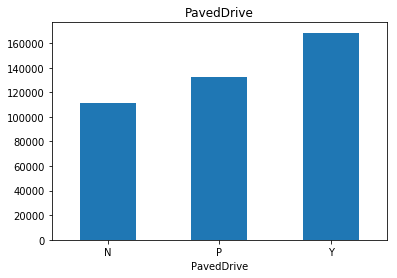

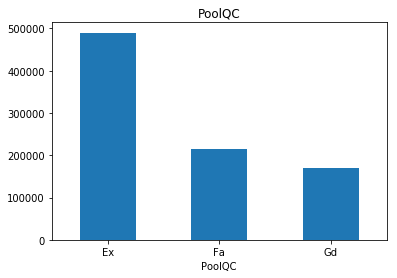

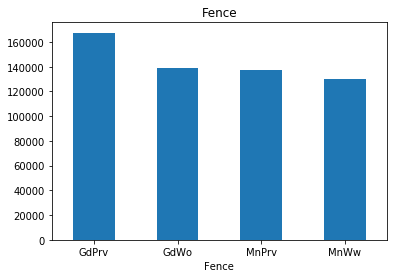

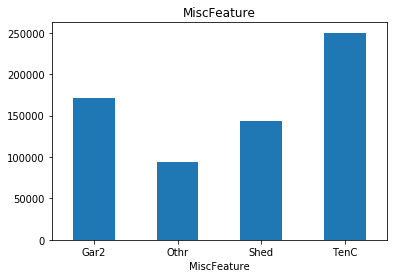

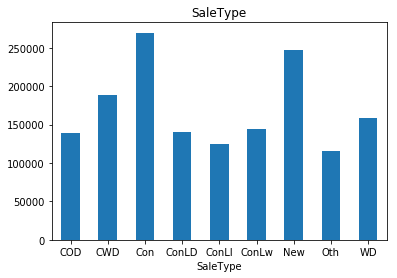

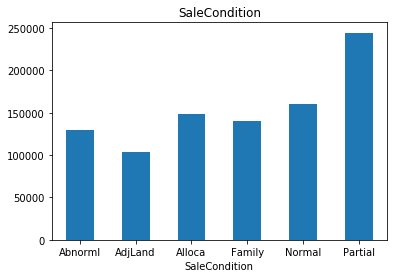

In [30]:
for var in category_variables:
    analyse_discrete(data,var)

Clearly, the categories give information on the SalePrice. In the feature engineering section, we will transform these strings / labels into numbers, so that we capture this information and transform it into a monotonic relationship between the category and the house price.